In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
data = np.loadtxt('start.dat', dtype=float)

In [9]:
n = len(data)
A = np.eye(n) - np.roll(np.eye(n), -1)

A[n, n-1]
A[0, n-1] = -1

In [10]:
A

array([[ 1.,  0.,  0., ...,  0.,  0., -1.],
       [-1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0., -1.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., -1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0., -1.,  0.]])

In [5]:
u = [data]
for i in range(255):
    u.append(u[i-1] - (0.5 * np.matmul(A, u[i-1])))

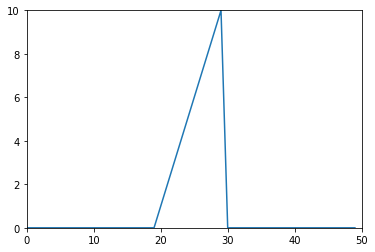

In [6]:
fig = plt.figure()
ax = plt.axes()
x = range(50)
line, = ax.plot([], [])

def init():
    global line
    line.set_data(x, u[0])
    return line,

def animate(i):
    global x, u, line
    line.set_data(x, u[i])
    return line,

plt.xlim(0, 50)
plt.ylim(0, 10)
animate(1)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=255, interval=20, blit=True)

In [7]:
from IPython.display import HTML
HTML(anim.to_jshtml())